In [1]:
import numpy as np

In [2]:
def create_perceptron(dim):
    """
    Create a perceptron of dimension `dim` and initialize it with random weights.
    """
    # we use dim+1 because we want to have a bias term and `dim` weights
    return np.random.random(dim+1)

In [3]:
def create_layer(num_perceptrons, dim, activation_function):
    """
    Create a layer of `num_perceptrons` perceptron, each of dimension `dim` with activation function `activation_function`.
    Initialize the weights of all perceptrons to a random float between 0 and 1.
    """
    # represent the layer as a list of dictionary of perceptrons
    layer = []
    for i in range(num_perceptrons):
        layer.append({"weights": create_perceptron(dim), "activation_function": activation_function})
    return layer

In [4]:
import numpy as np

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

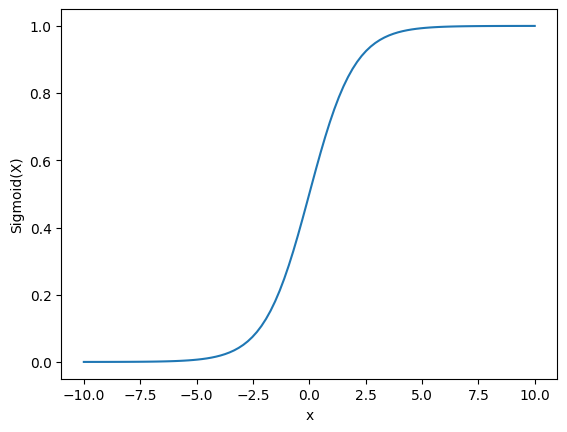

In [5]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

In [6]:
l1 = create_layer(5, 3, sigmoid)

In [7]:
def compute_output_for_layer(X, layer):
    """
    Compute the output of a layer for some input, `X`, a numpy array of
    """
    # our result will be a list of outputs for each perceptron
    result = []
    # for each perceptron in the layer
    for p in layer:
        # compute the dot product of the input with weights w_1, .., w_n and add the bias, w_0
        out = np.dot(X, p['weights'][1:]) + p['weights'][0]
        print('weights:', p['weights'][1:])
        print('bias:', p['weights'][0])
        # then, apply the activation function
        result.append(p['activation_function'](out))
    return result

In [8]:
X = [0.8, -2.3, 2.15]

In [9]:
o1 = compute_output_for_layer(X, l1)
o1

weights: [0.40926226 0.52031245 0.08796091]
bias: 0.7862727397022675
weights: [0.77136877 0.09005069 0.21978146]
bias: 0.39106080944154775
weights: [0.82857419 0.90861459 0.89117554]
bias: 0.782346894487743
weights: [0.30083544 0.51282386 0.3762166 ]
bias: 0.7512193685980312
weights: [0.57504263 0.33930572 0.03567028]
bias: 0.7893276657701185


[0.5264951258969524,
 0.7813531507659208,
 0.7809857511506428,
 0.6505047289176008,
 0.6331256999648351]

In [10]:
l2 = create_layer(2, 5, sigmoid)

In [11]:
o2 = compute_output_for_layer(o1, l2)
o2

weights: [0.65126858 0.60036523 0.55600262 0.5203891  0.44431478]
bias: 0.2679852174131072
weights: [0.44575894 0.67534282 0.01006073 0.77725491 0.36015958]
bias: 0.041520895416144565


[0.8941665115093171, 0.8242459820351861]

# **USING TENSORFLOW**

In [12]:
import tensorflow as tf

2024-03-28 12:58:30.532151: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [14]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [15]:
rank_2_tensor = tf.constant([[1,2,4],
                                 [5,6,7]])
print(rank_2_tensor)

tf.Tensor(
[[1 2 4]
 [5 6 7]], shape=(2, 3), dtype=int32)


# **BUILDING FIRST NEURAL NET USING KERAS**

In [19]:
from sklearn import datasets
iris = datasets.load_iris()

# the independent variables
print(iris.data.shape)

# the dependent variables
print(iris.target.shape)

(150, 4)
(150,)


In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
# Our input layer can have any number of perceptrons, we chose 4, however,
# the input dimension must match the number of features in the independent variable -- therefore, we set
# it to 4
model.add(Dense(4, input_dim=4, activation='relu'))

# we can add any number of hidden layers with any number of perceptrons; here we choose 1 layer with 128 perceptrons. The
# hidden layers should all use RELU
model.add(Dense(128, activation='relu'))

# softmax activation function is selected for multi-label classification problems; there are 3 perceptrons in this
# last layer because there are 3 target labels to predict (it matches the shape of y)
model.add(Dense(3, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,047 (4.09 KB)

 Trainable params: 1,047 (4.09 KB)

 Non-trainable params: 0 (0.00 B)

## **Training Model**

In [28]:
model.fit(X_train, y_train_encoded, validation_split=0.1, epochs=20, verbose=2)

Epoch 1/20
4/4 - 1s - 306ms/step - accuracy: 0.3426 - loss: 1.1639 - val_accuracy: 0.2500 - val_loss: 1.1142
Epoch 2/20
4/4 - 0s - 14ms/step - accuracy: 0.3426 - loss: 1.0596 - val_accuracy: 0.2500 - val_loss: 1.0168
Epoch 3/20
4/4 - 0s - 14ms/step - accuracy: 0.5463 - loss: 0.9779 - val_accuracy: 0.9167 - val_loss: 0.9540
Epoch 4/20
4/4 - 0s - 12ms/step - accuracy: 0.7222 - loss: 0.9344 - val_accuracy: 0.7500 - val_loss: 0.9058
Epoch 5/20
4/4 - 0s - 13ms/step - accuracy: 0.6574 - loss: 0.8960 - val_accuracy: 0.7500 - val_loss: 0.8654
Epoch 6/20
4/4 - 0s - 14ms/step - accuracy: 0.6574 - loss: 0.8606 - val_accuracy: 0.7500 - val_loss: 0.8237
Epoch 7/20
4/4 - 0s - 19ms/step - accuracy: 0.6574 - loss: 0.8191 - val_accuracy: 0.7500 - val_loss: 0.7888
Epoch 8/20
4/4 - 0s - 16ms/step - accuracy: 0.6574 - loss: 0.7902 - val_accuracy: 0.7500 - val_loss: 0.7530
Epoch 9/20
4/4 - 0s - 16ms/step - accuracy: 0.7222 - loss: 0.7455 - val_accuracy: 0.9167 - val_loss: 0.7208
Epoch 10/20
4/4 - 0s - 14ms

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.46931251883506775
Test Accuracy: 0.9333333373069763


In [30]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=10, activation='relu',))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)